In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize as opt
from scipy.stats import beta, uniform
%matplotlib inline

In [4]:
plt.style.use("ggplot")
np.random.seed(123)

## ベータ分布を描画する

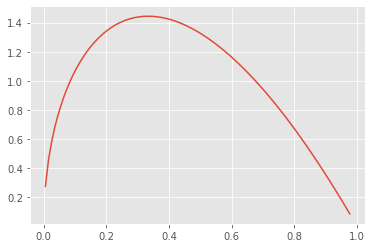

In [5]:
# ベータ分布のαとβの値を設定する
a, b = 1.5, 2.0

x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

## β分布の最大値を求める

In [6]:
# 求める対象の関数（ベータ関数）を設定
f = beta(a=a, b=b).pdf

# 符号をマイナスにして（逆にして）最小値を求める
res = opt.fmin(lambda x: -f(x), 0.3)
y_max = f(res)

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 10
         Function evaluations: 20


In [7]:
y_max

array([1.44337567])

d:\work\base_stan_prac\venv\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


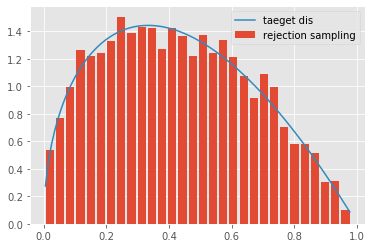

In [8]:
# モンテカルロステップ数
NMCS = 5000

# 提案分布を作成する
x_mcs = uniform.rvs(size=NMCS)
r = uniform.rvs(size=NMCS) * y_max

# 提案分布とベータ分布を比較し、ベータ分布の範囲に収まる場合、受け入れる
accept = x_mcs[r <= f(x_mcs)]

# ヒストグラム描画
plt.hist(accept, normed=True, bins=30, rwidth=0.8, label="rejection sampling")

# β分布描画
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b), label="taeget dis")
plt.legend()